In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Walmart Sales Project/data/Walmart.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [5]:
df['weekofyear'] = df['Date'].dt.weekofyear
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [6]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'weekofyear', 'year', 'month'],
      dtype='object')

In [7]:
df = df.drop('Date', axis = 1)
df.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekofyear,year,month
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,6,2010,2
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,7,2010,2


In [8]:
df_train = df[df['year']<2012]
df_test = df[df['year']==2012]

In [9]:
X_train=df.drop(['Weekly_Sales'],axis=1)
y_train=df['Weekly_Sales']


X_test=df.drop(['Weekly_Sales'],axis=1)
y_test=df['Weekly_Sales']

In [10]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [11]:
len(y_test),len(y_pred_lr)

(6435, 6435)

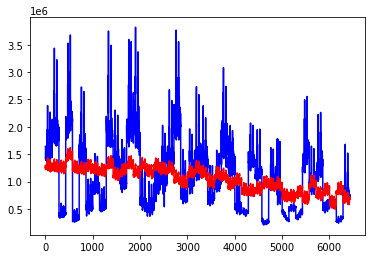

In [12]:
plt.plot(np.asarray(y_test), color = 'blue', label='test')   
plt.plot(y_pred_lr, color='red', label='pred')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, y_pred_lr))
print("RMSE : % f" %(rmse))

RMSE :  520420.226516


Feature "Store", Score: -15383.97544
Feature "Holiday_Flag", Score: 46616.62910
Feature "Temperature", Score: -1798.65900
Feature "Fuel_Price", Score: 63491.75705
Feature "CPI", Score: -2105.53047
Feature "Unemployment", Score: -22181.88143
Feature "weekofyear", Score: -8660.31910
Feature "year", Score: -29855.52133
Feature "month", Score: 51783.48883


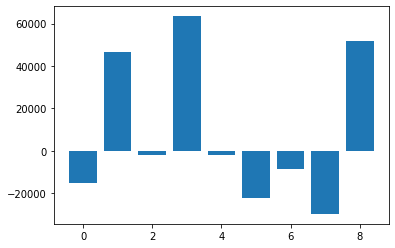

In [14]:
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature "%0s", Score: %.5f' % (X_train.columns[i],v))
  #print(f'Feature ')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [15]:
#Try to rebuild the model without "Temperature" and "CPI"
X_train_2 = X_train.drop(['Temperature','CPI'],axis =1)
X_test_2 = X_test.drop(['Temperature','CPI'],axis =1)
lr2 = LinearRegression()
lr2.fit(X_train_2, y_train)

y_pred_lr2 = lr2.predict(X_test_2)

In [16]:
rmse = np.sqrt(MSE(y_test, y_pred_lr2))
print("RMSE : % f" %(rmse)) # No Change

RMSE :  527688.219704


In [17]:
#Random forest regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

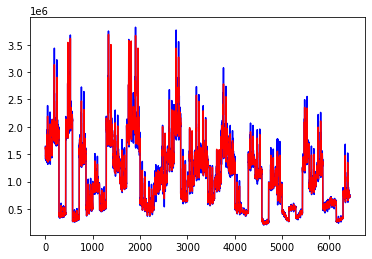

In [18]:
plt.plot(np.asarray(y_test), color = 'blue', label='test')   
plt.plot(y_pred_rf, color='red', label='pred')
plt.show()

In [19]:
rmse = np.sqrt(MSE(y_test, y_pred_rf))
print("RMSE : % f" %(rmse))

RMSE :  37682.047669


Random Forest Regression has a much smaller RMSE comparing with Linear Regression

Feature "Store", Score: 0.67041
Feature "Holiday_Flag", Score: 0.00155
Feature "Temperature", Score: 0.01251
Feature "Fuel_Price", Score: 0.00890
Feature "CPI", Score: 0.15246
Feature "Unemployment", Score: 0.09956
Feature "weekofyear", Score: 0.05036
Feature "year", Score: 0.00154
Feature "month", Score: 0.00272


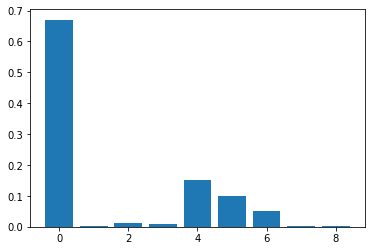

In [20]:
importance_rf = rf.feature_importances_
#importance_rf
for i,v in enumerate(importance_rf):
	print('Feature "%0s", Score: %.5f' % (X_train.columns[i],v))
  #print(f'Feature ')
# plot feature importance
plt.bar([x for x in range(len(importance_rf))], importance_rf)
plt.show()

In [29]:
#Try to rebuild the model without "Temperature" and "CPI"
X_train_3 = X_train.drop(['Holiday_Flag','year', 'month'],axis =1)
X_test_3 = X_test.drop(['Holiday_Flag','year','month'],axis =1)
rf2 = RandomForestRegressor(n_estimators=500, random_state=1)
rf2.fit(X_train_3, y_train)

y_pred_rf2 = rf2.predict(X_test_3)

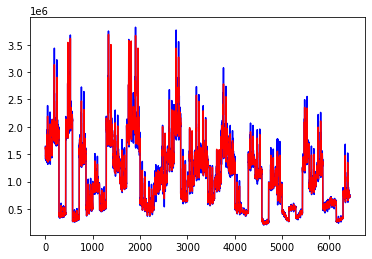

RMSE :  37682.047669


In [30]:
plt.plot(np.asarray(y_test), color = 'blue', label='test')   
plt.plot(y_pred_rf, color='red', label='pred')
plt.show()
rmse = np.sqrt(MSE(y_test, y_pred_rf))
print("RMSE : % f" %(rmse))

The RMSE after dropping holiday flag, year and month is the same. We can drop these 2 features to save computational power.

In [31]:
X_train = X_train_3
X_test = X_test_3

#Dimensionality Reduction

In [32]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [33]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.94759666e-01, 1.55410532e-01, 7.75322368e-02, 7.08812135e-02,
       1.33115187e-03, 8.51998953e-05])

In [34]:
rf_pca = RandomForestRegressor(n_estimators=500, random_state=1)
rf_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_pca.predict(X_test_pca)

In [35]:
rmse = np.sqrt(MSE(y_test, y_pred_rf_pca))
print("RMSE : % f" %(rmse))

RMSE :  68731.563667


In [36]:
#Applying KPCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 6)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

In [37]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.94759666e-01, 1.55410532e-01, 7.75322368e-02, 7.08812135e-02,
       1.33115187e-03, 8.51998953e-05])

In [40]:
rf_kpca = RandomForestRegressor(n_estimators=500, random_state=1)
rf_kpca.fit(X_train_kpca, y_train)
y_pred_rf_kpca = rf_kpca.predict(X_test_kpca)

In [41]:
rmse = np.sqrt(MSE(y_test, y_pred_rf_kpca))
print("RMSE : % f" %(rmse))

RMSE :  68731.563667


# Hyperparameter Tuning

In [43]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [1, 2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500],
    'random_state': [1, 4, 6]
}
# Create a based model
rf_gd = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_gd, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [44]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 1296 candidates, totalling 2592 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100,
 'random_state': 4}

In [45]:
best_grid = grid_search.best_estimator_

In [46]:
best_grid.fit(X_train, y_train)
y_pred_bg = best_grid.predict(X_test)

In [47]:
rmse = np.sqrt(MSE(y_test, y_pred_bg))
print("RMSE : % f" %(rmse)) 

RMSE :  90392.538069


In [48]:
# Create the parameter grid based on the results of random search 
param_grid2 = {
    'bootstrap': [True],
    'max_depth': [70, 75, 80, 85],
    'max_features': [3, 4, 5],
    'min_samples_leaf': [1, 4],
    'min_samples_split': [7, 8, 9],
    'n_estimators': [50, 100],
    'random_state': [3, 4, 5]
}
# Create a based model
rf_gd2 = RandomForestRegressor()
# Instantiate the grid search model
grid_search2 = GridSearchCV(estimator = rf_gd2, param_grid = param_grid2, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [49]:
# Fit the grid search to the data
grid_search2.fit(X_train, y_train)
grid_search2.best_params_

Fitting 2 folds for each of 432 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 70,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 50,
 'random_state': 5}

In [50]:
best_grid2 = grid_search2.best_estimator_
best_grid2.fit(X_train, y_train)
y_pred_bg2 = best_grid2.predict(X_test)

In [51]:
rmse = np.sqrt(MSE(y_test, y_pred_bg2))
print("RMSE : % f" %(rmse))

RMSE :  61737.736260


In [52]:
# Create the parameter grid based on the results of random search 
param_grid3 = {
    'bootstrap': [True],
    'max_depth': [60, 70, None],
    'max_features': [5, 6, 7],
    'min_samples_leaf': [1],
    'min_samples_split': [2, 6, 7],
    'n_estimators': [40, 50, 60],
    'random_state': [4]
}
# Create a based model
rf_gd3 = RandomForestRegressor()
# Instantiate the grid search model
grid_search3 = GridSearchCV(estimator = rf_gd3, param_grid = param_grid3, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [54]:
# Fit the grid search to the data
grid_search3.fit(X_train, y_train)
grid_search3.best_params_

Fitting 2 folds for each of 81 candidates, totalling 162 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
54 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 40,
 'random_state': 4}

In [55]:
best_grid3 = grid_search3.best_estimator_
best_grid3.fit(X_train, y_train)
y_pred_bg3 = best_grid3.predict(X_test)

In [56]:
rmse = np.sqrt(MSE(y_test, y_pred_bg3))
print("RMSE : % f" %(rmse))

RMSE :  40296.371264


In [61]:
param_grid4 = {
    'bootstrap': [True],
    'max_depth': [50, 55, 60, 65],
    'max_features': [5],
    'min_samples_leaf': [1],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [35, 40, 45],
    'random_state': [4]
}
# Create a based model
rf_gd4 = RandomForestRegressor()
# Instantiate the grid search model
grid_search4 = GridSearchCV(estimator = rf_gd4, param_grid = param_grid4, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [62]:
# Fit the grid search to the data
grid_search4.fit(X_train, y_train)
grid_search4.best_params_

Fitting 2 folds for each of 36 candidates, totalling 72 fits


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 35,
 'random_state': 4}

In [63]:
best_grid4 = grid_search4.best_estimator_
best_grid4.fit(X_train, y_train)
y_pred_bg4 = best_grid4.predict(X_test)

In [64]:
rmse = np.sqrt(MSE(y_test, y_pred_bg4))
print("RMSE : % f" %(rmse))

RMSE :  44146.195977


In [69]:
param_grid5 = {
    'bootstrap': [True],
    'max_depth': [50, 60, None],
    'max_features': [1, 5],
    'min_samples_leaf': [1],
    'min_samples_split': [2, 3],
    'n_estimators': [30,35,40,100],
    'random_state': [4]
}
# Create a based model
rf_gd5 = RandomForestRegressor()
# Instantiate the grid search model
grid_search5 = GridSearchCV(estimator = rf_gd5, param_grid = param_grid5, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [70]:
# Fit the grid search to the data
grid_search5.fit(X_train, y_train)
grid_search5.best_params_

Fitting 2 folds for each of 48 candidates, totalling 96 fits


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 30,
 'random_state': 4}

In [71]:
best_grid5 = grid_search5.best_estimator_
best_grid5.fit(X_train, y_train)
y_pred_bg5 = best_grid5.predict(X_test)

In [72]:
rmse = np.sqrt(MSE(y_test, y_pred_bg5))
print("RMSE : % f" %(rmse))

RMSE :  44040.803179


In [73]:
#Baseline model
rmse = np.sqrt(MSE(y_test, y_pred_rf))
print("RMSE : % f" %(rmse))

print("MAE: % f" %(mean_absolute_error(y_test, y_pred_rf)))

RMSE :  37682.047669
MAE:  20676.933028


We can stop and use the baseline model for the sales prediction
.